In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

In [4]:
# Step1 - 이미지 불러오기
I = cv2.imread('hero2.jpeg', cv2.IMREAD_GRAYSCALE)

cv2.imshow('image', I)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
# Step2 - Unsharp masking 구현하기, k값은 영상이 sharp하게 보이도록 적절한 수를 넣으세요.
def unsharp_masking(img, k):
    gaussian_filter_I = cv2.GaussianBlur(img,(5,5),10)                                                        # Step2-1. cv2.GaussianBlur 함수 이용해서 이미지 blur 처리 (Noise 제거)
    g_mask = np.array(I, dtype=np.float32) - np.array(gaussian_filter_I , dtype=np.float32)      # Step2-2. 원본 영상에서 Step2-1의 결과를 빼세요.
    g_mask = np.clip(g_mask,0,255)                                                                   # np.clip 이용해서 0~255로 범위 맞추기
    g_mask = g_mask.astype('uint8')                                             # float32 -> uint8 형변환
    g = np.array(I, dtype=np.float32) + k * np.array(g_mask , dtype=np.float32)                                                                     # Step2-3. 원본 영상에서 k x (Step2-2의 결과)를 더하세요. 
    g = np.clip(g,0,255)                                                                        # np.clip 이용해서 0~255로 범위 맞추기
    result = g.astype('uint8')                                                  # float32 -> uint8 형변환
    
    return result

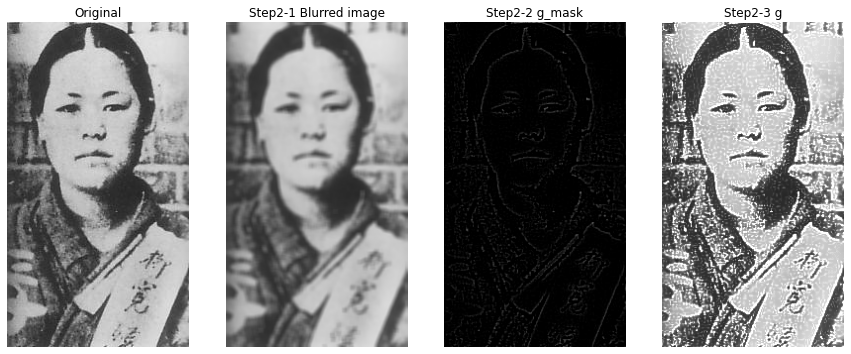

In [16]:
fig = plt.figure(figsize = (15, 15)) # rows*cols 행렬의 i번째 subplot 생성
rows = 1
cols = 4
  
## plotting 하는 부분은 1주차 과제를 참조하여 스스로 채워 넣으세요. 

Intensity_level = [ 256, 32, 16, 8, 4, 2]
step = [ np.rint(255 / (i - 1)) for i in Intensity_level ]                                                                     # np.clip 이용해서 0~255로 범위 맞추기

result_1 = np.rint(I / step[0]) *step[0]  
result_1 = result_1.astype('uint8')   
ax1 = fig.add_subplot(rows,cols,1)
result_1_RGB = cv2.cvtColor(result_1, cv2.COLOR_GRAY2RGB)      
ax1.imshow(result_1_RGB)
ax1.set_title('Original')
ax1.axis("off")

result_2 = np.rint(cv2.GaussianBlur(I,(5,5),10) / step[0]) *step[0]  
result_2 = result_2.astype('uint8') 
ax2 = fig.add_subplot(rows,cols,2)
result_2_RGB = cv2.cvtColor(result_2, cv2.COLOR_GRAY2RGB)      
ax2.imshow(result_2_RGB)
ax2.set_title('Step2-1 Blurred image')
ax2.axis("off")

gaussian_filter_I = cv2.GaussianBlur(I,(5,5),10)                                                        # Step2-1. cv2.GaussianBlur 함수 이용해서 이미지 blur 처리 (Noise 제거)
g_mask = np.array(I, dtype=np.float32) - np.array(gaussian_filter_I , dtype=np.float32)      # Step2-2. 원본 영상에서 Step2-1의 결과를 빼세요.
g_mask = np.clip(g_mask,0,255) 

result_3 = np.rint(g_mask / step[0]) *step[0]  
result_3 = result_3.astype('uint8') 
ax3 = fig.add_subplot(rows,cols,3)
result_3_RGB = cv2.cvtColor(result_3, cv2.COLOR_GRAY2RGB)      
plt.imshow(result_3_RGB)
ax3.set_title('Step2-2 g_mask')
ax3.axis("off")

result_4 = np.rint(unsharp_masking(I,7) / step[0]) *step[0]  
result_4 = result_4.astype('uint8') 
ax4 = fig.add_subplot(rows,cols,4)
result_4_RGB = cv2.cvtColor(result_4, cv2.COLOR_GRAY2RGB)      
plt.imshow(result_4_RGB)
ax4.set_title('Step2-3 g')
ax4.axis("off")

plt.show()